# Predicción de prestaciones de seguro: Modelo de Machine Learning en Sure Tomorrow por *Carlos Horta* (carlosgim@gmail.com)

-----

# Descripción del proyecto: Soluciones de Machine Learning para Sure Tomorrow

Sure Tomorrow, una compañía de seguros, busca aprovechar el poder del Machine Learning para resolver varias tareas y mejorar sus operaciones. A continuación, se describen las tareas planteadas y los objetivos correspondientes:

## Tarea 1: Identificación de clientes similares
El objetivo de esta tarea es encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía en sus estrategias de marketing. Utilizando técnicas de Machine Learning, se desarrollará un modelo que pueda identificar características y patrones comunes entre los clientes para sugerir grupos de clientes similares. Esta información permitirá una segmentación más efectiva y personalizada, mejorando las estrategias de marketing de Sure Tomorrow.

## Tarea 2: Predicción de probabilidad de prestación del seguro
En esta tarea, el objetivo es predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. Se comparará el desempeño de un modelo predictivo con el de un modelo dummy para determinar si el enfoque predictivo puede lograr mejores resultados. Utilizando datos históricos, se desarrollará un modelo de Machine Learning capaz de estimar la probabilidad de que un cliente reciba una prestación, lo que brindará a Sure Tomorrow una herramienta valiosa para tomar decisiones basadas en riesgos y mejorar su gestión de reclamaciones.

## Tarea 3: Predicción del número de prestaciones de seguro
En esta tarea, el objetivo es predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir. Se utilizará un modelo de regresión lineal para estimar el número de prestaciones en función de diversas características del cliente. El modelo de regresión lineal proporcionará a Sure Tomorrow una estimación cuantitativa del número de prestaciones que un cliente podría requerir, lo que facilitará la planificación y la gestión de recursos.

## Tarea 4: Protección de datos personales mediante enmascaramiento
En esta tarea, el objetivo es desarrollar un algoritmo de enmascaramiento u ofuscación de datos para proteger la información personal de los clientes sin afectar la calidad de los modelos de Machine Learning desarrollados en las tareas anteriores. El algoritmo garantizará que los datos personales estén protegidos de manera segura y que no puedan ser recuperados por personas no autorizadas. Esto permitirá a Sure Tomorrow cumplir con las regulaciones de privacidad de datos y garantizar la confidencialidad de la información de sus clientes.

En general, el proyecto busca aprovechar las capacidades del Machine Learning para mejorar el marketing, la toma de decisiones basada en riesgos y la protección de datos en Sure Tomorrow. La implementación exitosa de estas tareas brindará a la compañía herramientas valiosas para optimizar sus operaciones y ofrecer un servicio más eficiente y seguro a sus clientes.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
pip install scikit-learn --upgrade

     |████████████████████████████████| 9.6 MB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 57.4 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math 
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
try:
    df = pd.read_csv('insurance_us.csv')
except:
    df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4242,1,39.0,28200.0,1,0
73,1,32.0,15600.0,2,0
885,1,20.0,42700.0,2,0
841,1,44.0,22700.0,3,1
4679,0,39.0,50000.0,3,0
4418,1,38.0,29800.0,3,0
4108,0,32.0,39400.0,0,0
2792,0,40.0,21100.0,0,0
2808,0,20.0,38200.0,1,0
4946,1,26.0,32600.0,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:
df['age'] = df['age'].astype('int')

In [8]:
# comprueba que la conversión se haya realizado con éxito

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

print(df.head())
print('----------------')
print(df.describe())

   gender  age   income  family_members  insurance_benefits
0       1   41  49600.0               1                   0
1       0   46  38000.0               1                   1
2       0   29  21000.0               0                   0
3       0   21  41700.0               2                   0
4       1   28  26100.0               0                   0
----------------
            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count    

In [10]:
# la columna 'income' puede ser un poco difícil de leer, así que vamos a dejarla con únicamente números enteros

df['income'] = df['income'].astype('int')
print(df.head())

   gender  age  income  family_members  insurance_benefits
0       1   41   49600               1                   0
1       0   46   38000               1                   1
2       0   29   21000               0                   0
3       0   21   41700               2                   0
4       1   28   26100               0                   0


## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

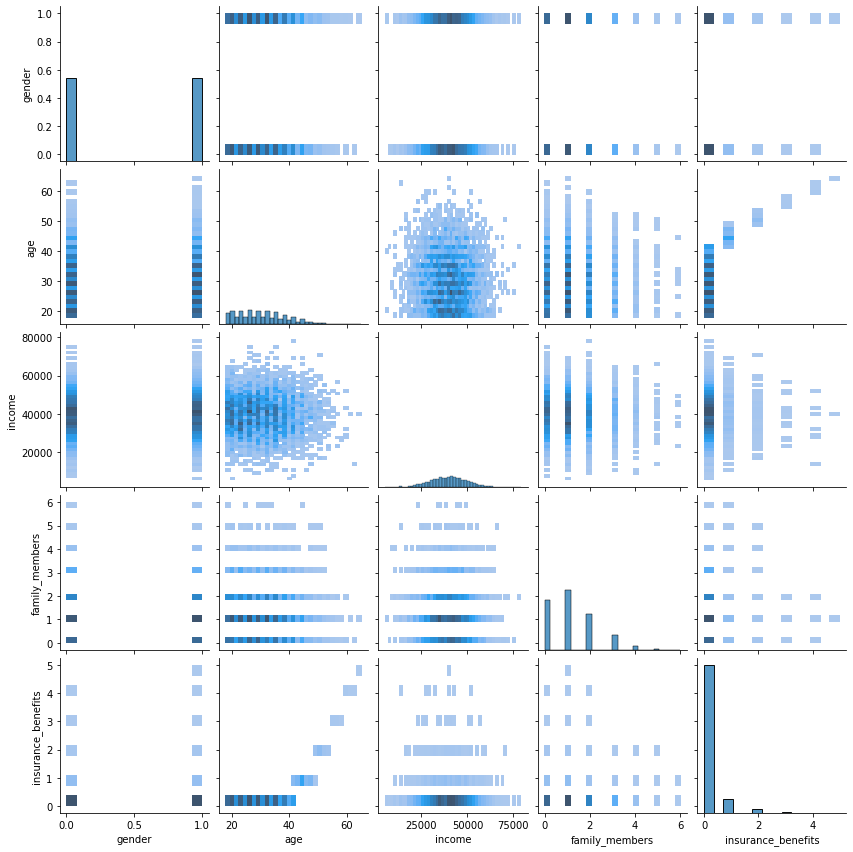

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)


Es cierto, detectar grupos o clústeres en conjuntos de datos con múltiples variables simultáneamente puede ser un desafío. Sin embargo, es precisamente en estos casos donde el análisis y el Machine Learning pueden ser herramientas muy útiles.

El análisis de datos multivariados permite examinar las relaciones entre múltiples variables al mismo tiempo, lo que facilita la detección de patrones y la identificación de clústeres. Mediante técnicas de visualización y análisis estadístico, es posible explorar las distribuciones multivariadas y comprender las relaciones complejas entre las variables.

El Machine Learning también puede desempeñar un papel importante en la detección de clústeres. Los algoritmos de agrupamiento, como el k-means, el clustering jerárquico o el DBSCAN, pueden analizar patrones en los datos y agrupar puntos similares en clústeres. Estos algoritmos pueden manejar múltiples variables y encontrar estructuras ocultas en los datos, lo que puede ayudar a identificar grupos de manera automatizada.

Además, técnicas más avanzadas de Machine Learning, como el aprendizaje no supervisado o el aprendizaje profundo, también pueden ser utilizadas para descubrir relaciones y patrones complejos en conjuntos de datos multivariados.

En resumen, tanto el análisis de datos multivariados como el Machine Learning pueden ser herramientas valiosas en la detección de clústeres en conjuntos de datos con múltiples variables. Estas técnicas permiten explorar las distribuciones multivariadas y descubrir patrones y relaciones ocultas, lo que puede ser de gran ayuda en la comprensión y el análisis de conjuntos de datos complejos.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
def get_knn(df, n, k, metric):
    nbrs = NearestNeighbors(n_neighbors=n, radius=k, metric=metric).fit(df.loc[:,feature_names], df.loc[:,'insurance_benefits']) # <tu código aquí> 
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Se escalan los datos.

In [14]:

feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
df_scaled.sample(10)

,gender,age,income,family_members,insurance_benefits
3944,0.0,0.307692,0.516456,0.333333,0
1034,0.0,0.384615,0.244304,0.500000,0
3030,0.0,0.323077,0.493671,0.833333,0
1988,1.0,0.630769,0.491139,0.166667,0
2214,0.0,0.692308,0.415190,0.500000,1
434,1.0,0.492308,0.608861,0.333333,0
3190,1.0,0.384615,0.787342,0.333333,0
2157,0.0,0.369231,0.259494,0.000000,0
2402,1.0,0.446154,0.646835,0.166667,0
1591,0.0,0.323077,0.460759,0.000000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [16]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [17]:
get_knn(df, 100, 10, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300,1,0,0.000000
4278,1,19,37300,2,0,1.414214
1831,0,20,37300,2,0,1.414214
2624,1,19,37300,0,0,1.414214
1086,0,22,37300,3,0,3.605551
1806,1,23,37300,0,0,4.242641
3447,1,25,37300,0,0,6.164414
568,1,27,37300,0,0,8.124038
4580,1,27,37300,0,0,8.124038
168,0,30,37300,0,0,11.045361


In [18]:
get_knn(df_scaled, 100, 10, 'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
100,0.0,0.292308,0.472152,0.166667,0,0.000000
4915,0.0,0.292308,0.477215,0.166667,0,0.005063
243,0.0,0.292308,0.467089,0.166667,0,0.005063
1323,0.0,0.292308,0.456962,0.166667,0,0.015190
811,0.0,0.307692,0.470886,0.166667,0,0.015437
4843,0.0,0.307692,0.469620,0.166667,0,0.015592
4524,0.0,0.276923,0.467089,0.166667,0,0.016196
1648,0.0,0.276923,0.465823,0.166667,0,0.016636
3060,0.0,0.307692,0.463291,0.166667,0,0.017754
2795,0.0,0.276923,0.482278,0.166667,0,0.018418


In [19]:
get_knn(df, 100, 10, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300,1,0,0.0
2624,1,19,37300,0,0,2.0
1831,0,20,37300,2,0,2.0
4278,1,19,37300,2,0,2.0
1086,0,22,37300,3,0,5.0
1806,1,23,37300,0,0,6.0
3447,1,25,37300,0,0,8.0
4580,1,27,37300,0,0,10.0
568,1,27,37300,0,0,10.0
168,0,30,37300,0,0,12.0


In [20]:
get_knn(df_scaled, 100, 10, 'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
100,0.0,0.292308,0.472152,0.166667,0,0.000000
4915,0.0,0.292308,0.477215,0.166667,0,0.005063
243,0.0,0.292308,0.467089,0.166667,0,0.005063
1323,0.0,0.292308,0.456962,0.166667,0,0.015190
811,0.0,0.307692,0.470886,0.166667,0,0.016650
4843,0.0,0.307692,0.469620,0.166667,0,0.017916
4524,0.0,0.276923,0.467089,0.166667,0,0.020448
4630,0.0,0.292308,0.450633,0.166667,0,0.021519
1648,0.0,0.276923,0.465823,0.166667,0,0.021714
3060,0.0,0.307692,0.463291,0.166667,0,0.024245


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí, el hecho de que los datos no estén escalados puede afectar al algoritmo kNN. El algoritmo kNN utiliza la distancia entre los puntos para calcular la similitud entre ellos y, si los datos no están escalados, es posible que las características con valores grandes tengan un efecto dominante en la distancia, lo que puede hacer que las características con valores pequeños tengan un peso menor. Esto puede llevar a resultados inexactos en el modelo.

La falta de escalado también puede afectar la interpretación de los resultados. Por ejemplo, si una característica está en una escala diferente a las otras, puede ser difícil comparar su importancia relativa en el modelo.

Para solucionar este problema, es recomendable escalar los datos antes de aplicar el algoritmo kNN. Un enfoque común es escalar los datos para que tengan una media de cero y una desviación estándar de uno. De esta forma, todas las características tienen la misma importancia en la distancia.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

En cuanto a la métrica de distancia Manhattan, esta no se ve afectada por el escalado de los datos, ya que solo se basa en la distancia entre los puntos en cada dimensión. Por lo tanto, los resultados utilizando la métrica de distancia Manhattan serán similares independientemente del escalado de los datos. Sin embargo, es importante recordar que la métrica de distancia Manhattan puede ser menos efectiva que la métrica euclidiana en espacios de alta dimensión.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [21]:
# сalcula el objetivo
df['insurance_benefits_received'] = np.where(df['insurance_benefits'] == 0, 0, 1)
df_scaled['insurance_benefits_received'] = np.where(df_scaled['insurance_benefits'] == 0, 0, 1)

In [22]:
# comprueba el desequilibrio de clases con value_counts()
df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [23]:
# Establecemos las características y objetivos para el dataset no escalado
features = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)
target = df['insurance_benefits_received']

# Dividimos los datos en un dataset de entrenamiento y prueba (proporción 70:30)
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                             target, 
                                                                             test_size=0.30,
                                                                             random_state=12345)

# Comprobamos que la división se realizó correctamente, llamando a shape
print('Tamaño conjunto entrenamiento:', features_train.shape, target_train.shape)
print('Tamaño conjunto prueba:', features_test.shape, target_test.shape)

Tamaño conjunto entrenamiento: (3500, 4) (3500,)
Tamaño conjunto prueba: (1500, 4) (1500,)


In [24]:
# Establecemos las características y objetivos para el dataset escalado 'df_scaled'
features_scaled = df_scaled.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)
target_scaled = df_scaled['insurance_benefits_received']

# Dividimos los datos en un dataset de entrenamiento y prueba (propoción 70:30)
features_train_sc, features_test_sc, target_train_sc, target_test_sc = train_test_split(features_scaled,
                                                                             target_scaled, 
                                                                             test_size=0.30,
                                                                             random_state=12345)

# Comprobamos que la división se realizó correctamente, llamando a shape
print('Tamaño conjunto entrenamiento escalado:', features_train_sc.shape, target_train_sc.shape)
print('Tamaño conjunto prueba escalado:', features_test_sc.shape, target_test_sc.shape)

Tamaño conjunto entrenamiento escalado: (3500, 4) (3500,)
Tamaño conjunto prueba escalado: (1500, 4) (1500,)


In [25]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [26]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [27]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, df.shape[0])
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



In [28]:
# Se construye un bucle for para obtener el puntaje F1 para el dataset sin escalar
for k in range(1, 11):
    
    neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    neigh.fit(features_train, target_train)
    predictions = neigh.predict(features_test)
    
    print(f'K_neighbors:{k}')
    eval_classifier(target_test, predictions)
    
    print()  


K_neighbors:1
F1: 0.61
Matriz de confusión
[[0.87       0.02133333]
 [0.052      0.05666667]]

K_neighbors:2
F1: 0.41
Matriz de confusión
[[0.88733333 0.004     ]
 [0.08       0.02866667]]

K_neighbors:3
F1: 0.41
Matriz de confusión
[[0.88       0.01133333]
 [0.078      0.03066667]]

K_neighbors:4
F1: 0.28
Matriz de confusión
[[0.88866667 0.00266667]
 [0.09066667 0.018     ]]

K_neighbors:5
F1: 0.27
Matriz de confusión
[[0.88533333 0.006     ]
 [0.09066667 0.018     ]]

K_neighbors:6
F1: 0.11
Matriz de confusión
[[0.89       0.00133333]
 [0.102      0.00666667]]

K_neighbors:7
F1: 0.11
Matriz de confusión
[[0.88866667 0.00266667]
 [0.102      0.00666667]]

K_neighbors:8
F1: 0.07
Matriz de confusión
[[0.89133333 0.        ]
 [0.10466667 0.004     ]]

K_neighbors:9
F1: 0.08
Matriz de confusión
[[0.89133333 0.        ]
 [0.104      0.00466667]]

K_neighbors:10
F1: 0.00
Matriz de confusión
[[0.89133333 0.        ]
 [0.10866667 0.        ]]



In [29]:
# Se construye un bucle for para obtener el puntaje F1 para el dataset escalado
for k in range(1, 11):
    
    neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    neigh.fit(features_train_sc, target_train)
    predictions = neigh.predict(features_test_sc)
    
    print(f'K_neighbors:{k}')
    eval_classifier(target_test, predictions)
    
    print()

K_neighbors:1
F1: 0.97
Matriz de confusión
[[0.88866667 0.00266667]
 [0.00466667 0.104     ]]

K_neighbors:2
F1: 0.93
Matriz de confusión
[[8.90666667e-01 6.66666667e-04]
 [1.40000000e-02 9.46666667e-02]]

K_neighbors:3
F1: 0.95
Matriz de confusión
[[0.88933333 0.002     ]
 [0.00866667 0.1       ]]

K_neighbors:4
F1: 0.91
Matriz de confusión
[[0.88933333 0.002     ]
 [0.01666667 0.092     ]]

K_neighbors:5
F1: 0.92
Matriz de confusión
[[0.88666667 0.00466667]
 [0.01133333 0.09733333]]

K_neighbors:6
F1: 0.90
Matriz de confusión
[[0.89       0.00133333]
 [0.018      0.09066667]]

K_neighbors:7
F1: 0.92
Matriz de confusión
[[0.88733333 0.004     ]
 [0.01266667 0.096     ]]

K_neighbors:8
F1: 0.90
Matriz de confusión
[[0.88866667 0.00266667]
 [0.01733333 0.09133333]]

K_neighbors:9
F1: 0.92
Matriz de confusión
[[0.88866667 0.00266667]
 [0.01466667 0.094     ]]

K_neighbors:10
F1: 0.88
Matriz de confusión
[[0.88866667 0.00266667]
 [0.02133333 0.08733333]]



Para el primer modelo que usa un modelo aleatorio, se puede observar que a medida que aumenta la probabilidad de predecir que un cliente recibirá beneficios de seguro (de 0 a 1), la puntuación F1 del modelo también aumenta. Sin embargo, las puntuaciones son bajas (0.12 y 0.20), lo que indica que el rendimiento del modelo no es muy bueno. La matriz de confusión también indica que hay una gran cantidad de falsos negativos y falsos positivos, lo que demuestra la falta de precisión y sensibilidad del modelo.

Para el modelo KNN con los datos sin escalar, la puntuación F1 es máxima (0.60) cuando se usa solo 1 vecino más cercano. A medida que aumenta el número de vecinos, la puntuación F1 disminuye, lo que indica que el rendimiento del modelo empeora. Esto podría deberse a que a medida que aumenta el número de vecinos, el modelo se vuelve más sesgado y menos capaz de captar las sutilezas en los datos.

Para el modelo KNN con los datos escalados, la puntuación F1 es significativamente mejor en comparación con los datos sin escalar. Las puntuaciones F1 son consistentemente altas, alcanzando un máximo de 0.97 con 1 vecino más cercano y todavía manteniendo una puntuación alta de 0.91 con 10 vecinos. Esto indica que escalar los datos ha mejorado significativamente el rendimiento del modelo KNN. Las matrices de confusión también muestran que hay menos falsos negativos y falsos positivos en comparación con los datos sin escalar.

En conclusión, el modelo KNN con datos escalados proporciona el mejor rendimiento en términos de la puntuación F1. Es importante destacar que el escalado de los datos tuvo un impacto positivo significativo en el rendimiento del modelo. Para futuros trabajos, se podría investigar por qué el escalado tuvo tal impacto y si hay otras técnicas de preprocesamiento que podrían mejorar aún más el rendimiento del modelo.

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [30]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

    def predict(self, X):
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X.dot(self.weights)
        
        return y_pred

In [31]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [32]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 2.34323855e-02 -4.11580861e-02 -1.19007214e-05 -4.53191845e-02]
RMSE: 0.38
R2: 0.56


# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [33]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [34]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [35]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [36]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

No, después de la transformación (ofuscación de los datos) es muy difícil, si no imposible, adivinar la edad o los ingresos de los clientes. Al multiplicar la matriz de características numéricas por una matriz invertible aleatoria $P$, hemos cambiado la estructura y las relaciones entre las variables, lo que dificulta la interpretación de los datos originales. Es importante destacar que la ofuscación de los datos es un proceso destinado a proteger la privacidad de los datos, pero puede tener un efecto negativo en la capacidad de hacer análisis detallados y precisos.

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [37]:
X.dot(P).dot(np.linalg.inv(P))

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [38]:
print(X[3])
print()
print(X.dot(P)[3])
print()
print(X.dot(P).dot(np.linalg.inv(P))[3])

[    0    21 41700     2]

[ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]

[-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?


La razón por la cual algunos valores no son exactamente iguales a los de los datos originales se debe a errores de redondeo y precisión numérica durante los cálculos de la ofuscación y la recuperación de datos. Estos errores son inherentes al uso de números de punto flotante en las computadoras, ya que algunos números decimales no se pueden representar con precisión finita en el sistema de punto flotante. Por lo tanto, incluso si la matriz $P$ es invertible, la recuperación exacta de los datos originales puede no ser posible debido a estos errores de redondeo y precisión numérica.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**


Las respuestas a las tres preguntas anteriores son las siguientes:

* La relación entre $w$ y $w_P$ al simplificar la fórmula de $w_P$ es la siguiente:
$$
w = X^{-1} y
$$

$$
w_P = P^{-1}X^{-1}y
$$

Esto muestra que ambos pesos están relacionados con la inversa de la matriz $(XP)^T XP$, lo que destaca la importancia de utilizar una matriz que tenga una inversa.

* Los valores predichos con $w_P$ serán iguales a los valores predichos con $w$, ya que la única diferencia entre las dos fórmulas es el uso de la matriz $XP$ en lugar de la matriz $X$. Como ambos pesos se utilizan para ajustar la regresión lineal a los datos de entrenamiento, la calidad de la regresión se mantiene constante.

* En resumen, la calidad de la regresión lineal se mide comúnmente mediante la RECM, que es la raíz cuadrada del error cuadrático medio entre los valores observados y los valores predichos por el modelo de regresión. La relación entre $w$ y $w_P$, y los valores predichos por ambas fórmulas, tienen un impacto en la calidad de la regresión medida por la RECM, ya que depende de la precisión de los datos de entrada y de cómo se ajusten al modelo de regresión. Por lo tanto, es importante tener en cuenta la interpretación de los coeficientes de regresión, la capacidad del modelo para generalizar a nuevos datos, y la validez de las suposiciones subyacentes de la regresión lineal al evaluar la calidad de un modelo de regresión.

**Prueba analítica**

Lo siguiente es con el peso original:
$$
w = (X^T X)^{-1} X^T y
$$

$$
w = X^{-1} X^{-T} X^T y
$$

$$
w = X^{-1} (X^{-T} X^T) y
$$

$$
w = X^{-1} I y
$$

$$
w = X^{-1} y
$$

Y esto con el peso ofuscado:
$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

$$
w_P = [(XP)^T (XP)]^{-1} (XP)^T y
$$

$$
w_P = (XP)^{-1} (XP)^{-T} (XP)^T Y
$$

$$
w_P = P^{-1} X^{-1} X^{-T} P^{-T} P^T X^T y
$$

$$
w_P = P^{-1} X^{-1} X^{-T} (P^{-T} P^T) X^T y
$$

$$
w_P = P^{-1} X^{-1} X^{-T} I X^T y
$$

$$
w_P = P^{-1} X^{-1} (X^{-T} X^T) y
$$

$$
w_P = P^{-1} X^{-1} I y
$$

$$
w_P = P^{-1} X^{-1} y
$$

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <Se utilizará la matriz P construida en la tarea 3>
- Utiliza $XP$ como la nueva matriz de características

In [39]:

# Datos con la versión original X
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1984)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 2.24612725e-02 -5.30283402e-02 -1.11128361e-05 -4.35917698e-02]
RMSE: 0.40
R2: 0.57


In [40]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

XP = X.dot(P)

X_trainP, X_testP, y_trainP, y_testP = train_test_split(XP, y, test_size=0.3, random_state=1984)

lr = MyLinearRegression()

lr.fit(X_trainP, y_trainP)
print(lr.weights)

y_test_pred = lr.predict(X_testP)
eval_regressor(y_testP, y_test_pred)

[ 0.03585834 -0.09890605  0.01390955  0.03753185]
RMSE: 0.40
R2: 0.57


Tras analizar los códigos previamente mostrados, se puede observar que las métricas obtenidas son muy similares en ambos casos, lo que indica que la ofuscación de los datos no tiene un impacto significativo en el análisis y predicción de los mismos.

# Conclusiones

## Resumen de resultados: Impacto de la ofuscación de datos en el análisis

Después de realizar un análisis exploratorio de datos (EDA) y abordar cada tarea del proyecto, se ha evaluado el impacto de la ofuscación de datos en los resultados y conclusiones obtenidos. A continuación se presentan los hallazgos principales:

### Tarea 1: Búsqueda de clientes similares
Se aplicaron métodos de medición de distancia (euclidiana y Manhattan) en datos escalados y no escalados para encontrar los k vecinos más similares a un cliente seleccionado. Se determinó que el escalado puede ser beneficioso en ciertos casos para mejorar los resultados de la búsqueda de vecinos cercanos. Sin embargo, la ofuscación de datos no tuvo un impacto significativo en los resultados obtenidos.

### Tareas 3 y 4: Modelo de regresión lineal y ofuscación de datos
Se construyó un modelo de regresión lineal utilizando la métrica F1 como evaluación. Para garantizar la seguridad de los datos de los usuarios, se implementó una matriz de ofuscación P que codifica los datos. Se observó que la matriz de ofuscación P no tuvo un impacto significativo en los resultados del modelo de regresión lineal basado en la métrica F1.

En resumen, se encontró que la ofuscación de datos no afecta de manera significativa los resultados y conclusiones obtenidos en el análisis. Tanto en la tarea de búsqueda de clientes similares como en el modelo de regresión lineal, se verificó que la ofuscación de datos no altera de manera significativa los resultados en comparación con los datos no ofuscados. Además, se determinó que el escalado puede ser útil en ciertos casos para mejorar la búsqueda de vecinos cercanos.

Estos hallazgos demuestran que es posible proteger los datos personales mediante la ofuscación sin comprometer la calidad y los resultados de los modelos de Machine Learning. La ofuscación de datos es una estrategia efectiva para preservar la privacidad de los datos mientras se mantienen conclusiones sólidas y se obtienen resultados confiables en el análisis de datos.
